# cuSignal Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

# Imports

In [1]:
import cusignal
import cupy as cp
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# cuSignal I/O

Data downloaded from: https://sccn.ucsd.edu/~arno/fam2data/publicly_available_EEG_data.html

# Read sample data

In [2]:
data = cusignal.read_bin(
    '../data/sub-01_ses-1_task-BreathCounting_eeg_SMALL.bdf'
    , dtype=cp.uint8
    , num_samples=200
    , offset=1000
)

#### cusignal.filter_design.fir_filter_design.cmplx_sort()

In [3]:
p_sorted, indx = cusignal.cmplx_sort(data)
p_sorted, indx

(array([ 32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  65,
         65,  65,  69,  69,  69,  99,  99,  99,  99,  99,  99, 100, 100,
        100, 101, 101, 101, 101, 101, 101, 101, 101

#### cusignal.filter_design.fir_filter_design.firwin()

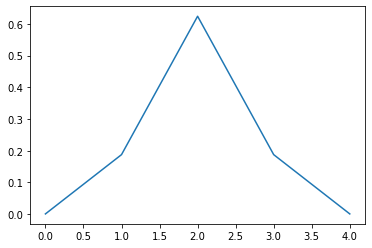

In [4]:
filter_cusignal = cusignal.firwin(
    5
    , cutoff=.1
    , width=3
    , window='hamming'
    , pass_zero=True
    , scale=True
)

plt.plot(cp.asnumpy(filter_cusignal))

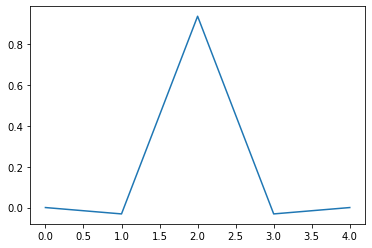

In [5]:
filter_cusignal = cusignal.firwin(
    5
    , cutoff=.1
    , width=3
    , window='hamming'
    , pass_zero=False
    , scale=True
)

plt.plot(cp.asnumpy(filter_cusignal))

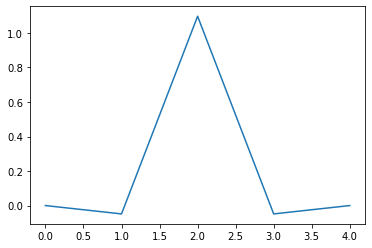

In [6]:
filter_cusignal = cusignal.firwin(
    5
    , cutoff=[0.2,0.4]
    , width=3
    , window='hamming'
    , pass_zero=True
    , scale=True
    , fs=None
)

plt.plot(cp.asnumpy(filter_cusignal))

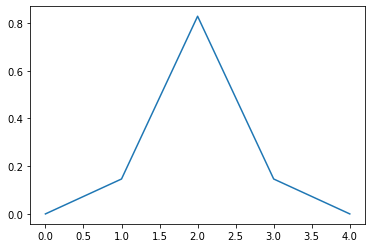

In [7]:
filter_cusignal = cusignal.firwin(
    5
    , cutoff=[0.2,0.4]
    , width=3
    , window='blackman'
    , pass_zero=False
    , scale=True
)

plt.plot(cp.asnumpy(filter_cusignal))

#### cusignal.filter_design.fir_filter_design.kaiser_atten()

In [8]:
attenuation = cusignal.kaiser_atten(
    10
    , .1
)

#### cusignal.filter_design.fir_filter_design.kaiser_beta()

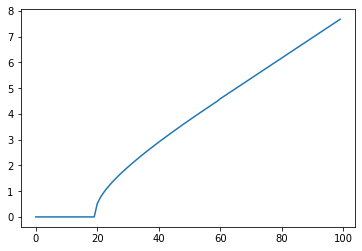

In [9]:
betas = [cusignal.kaiser_beta(cusignal.kaiser_atten(
    i
    , .1)) for i in range(100)]
plt.plot(betas)

#### cusignal.filtering.resample.decimate()

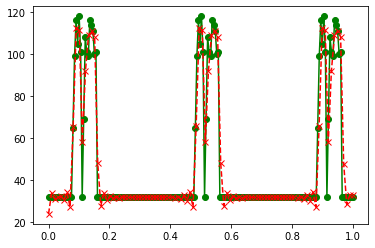

In [10]:
downsampled = cusignal.decimate(
    x=data
    , q=2
    , n=None
    , axis=-1
    , zero_phase=True
)

x = cp.linspace(0, 1, len(data))
x_downsampled = cp.linspace(0, 1, len(downsampled))
plt.plot(cp.asnumpy(x), cp.asnumpy(data), 'go-', cp.asnumpy(x_downsampled), cp.asnumpy(downsampled), 'rx--')

#### cusignal.filtering.resample.resample()

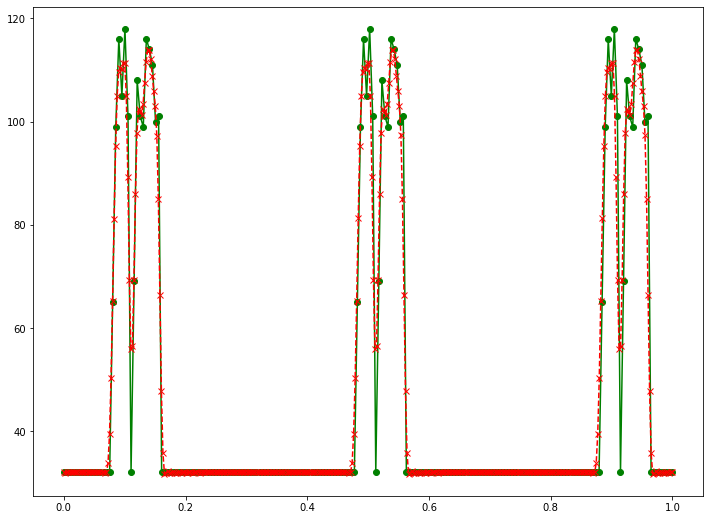

In [11]:
upsampled = cusignal.resample(
    x=data
    , num=400
    , t=list(range(-5,5,1))
    , axis=0
    , window=('kaiser', 5.0)
    , domain='time'
)

x = cp.linspace(0, 1, len(data))
x_upsampled = cp.linspace(0, 1, len(upsampled[1]))

plt.figure(figsize=(12,9))
plt.plot(
    cp.asnumpy(x), cp.asnumpy(data), 'go-'
    , cp.asnumpy(x_upsampled), cp.asnumpy(upsampled[0]), 'rx--')

#### cusignal.filtering.resample.resample_poly()

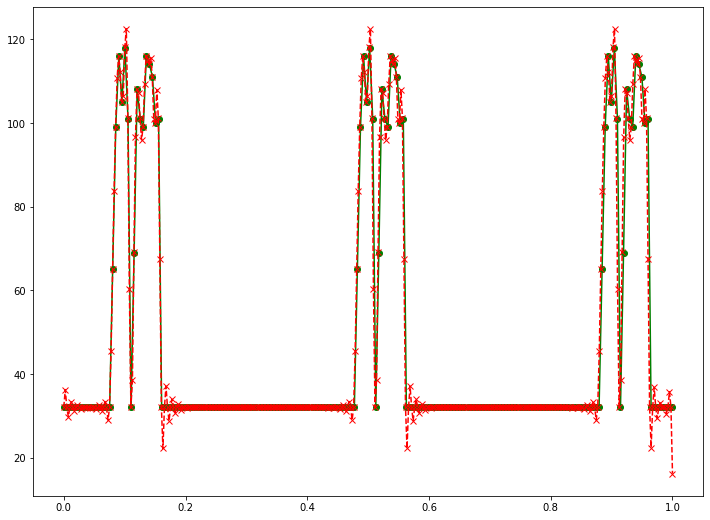

In [12]:
upsampled = cusignal.resample_poly(
    data
    , up=400
    , down=200
    , axis=0
    , window=('kaiser', 5.0)
)

x = cp.linspace(0, 1, len(data))
x_upsampled = cp.linspace(0, 1, len(upsampled))

plt.figure(figsize=(12,9))
plt.plot(cp.asnumpy(x), cp.asnumpy(data), 'go-', cp.asnumpy(x_upsampled), cp.asnumpy(upsampled), 'rx--')

# upsampled